In [74]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import MultipleLocator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

pd.set_option('display.max_columns', None)
%matplotlib inline

In [75]:
df = pd.read_csv('data/lending_club_loan_two.csv')

In [76]:
df['int_rate'].quantile(0.75)

np.float64(16.49)

In [77]:
df['int_rate'].quantile(0.25)


np.float64(10.49)

In [78]:
(df['int_rate'] > 25.49).sum() 

np.int64(3750)

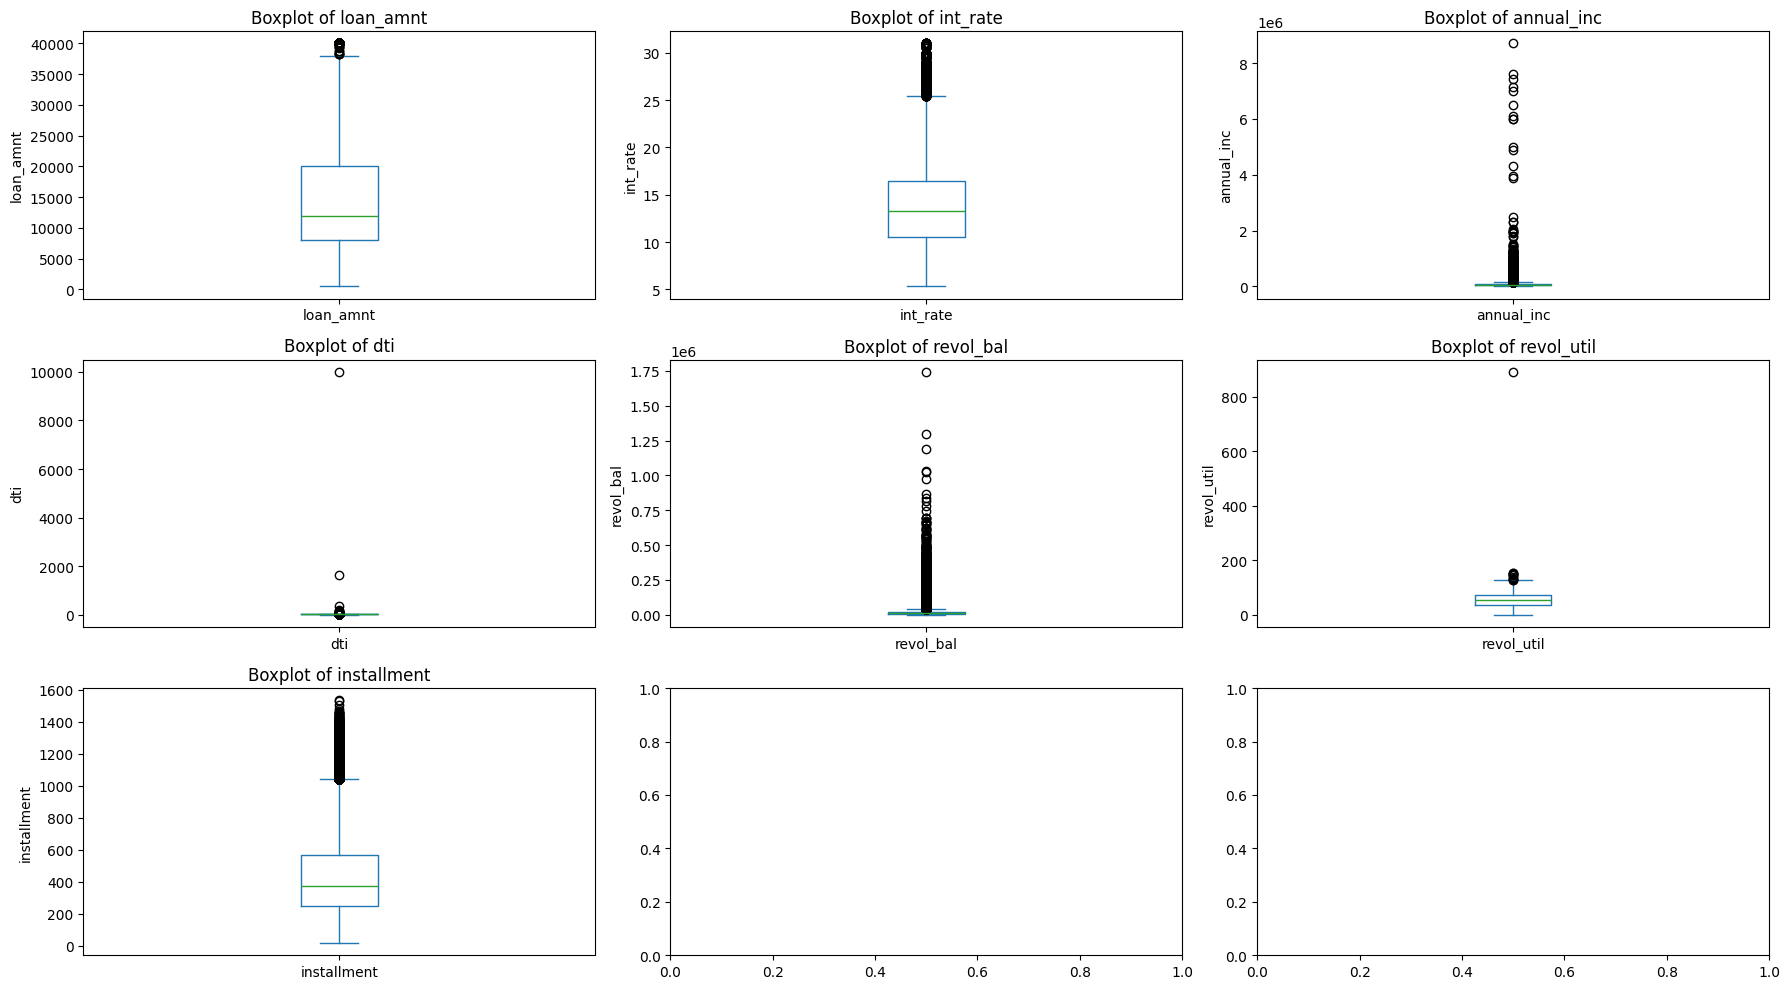

In [79]:
cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'installment']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 10))  

for ax, col in zip(axes.flatten(), cols):
    df[col].plot.box(ax=ax)
    ax.set_title(f"Boxplot of {col}")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()



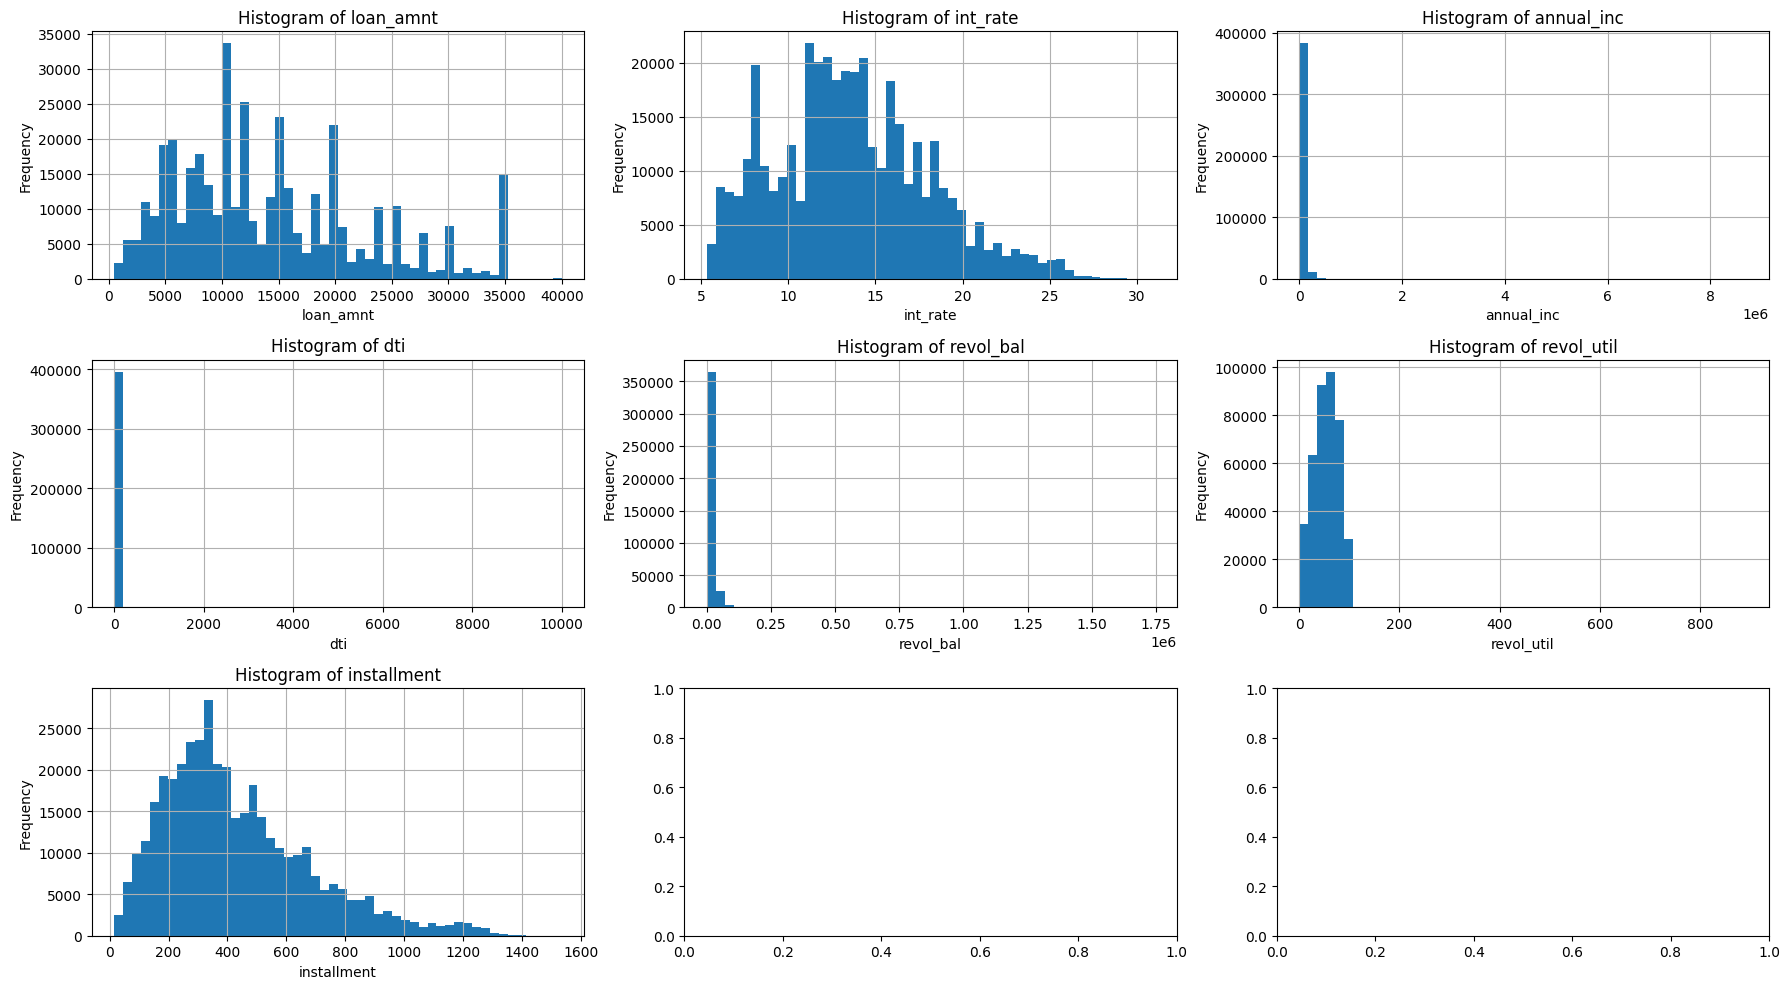

In [80]:
import matplotlib.pyplot as plt

cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'installment']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 10))  

for ax, col in zip(axes.flatten(), cols):
    df[col].hist(bins=50, ax=ax)
    ax.set_title(f"Histogram of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()


In [81]:
cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'installment']

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    df = df[(df[col] >= lower) & (df[col] <= upper)]


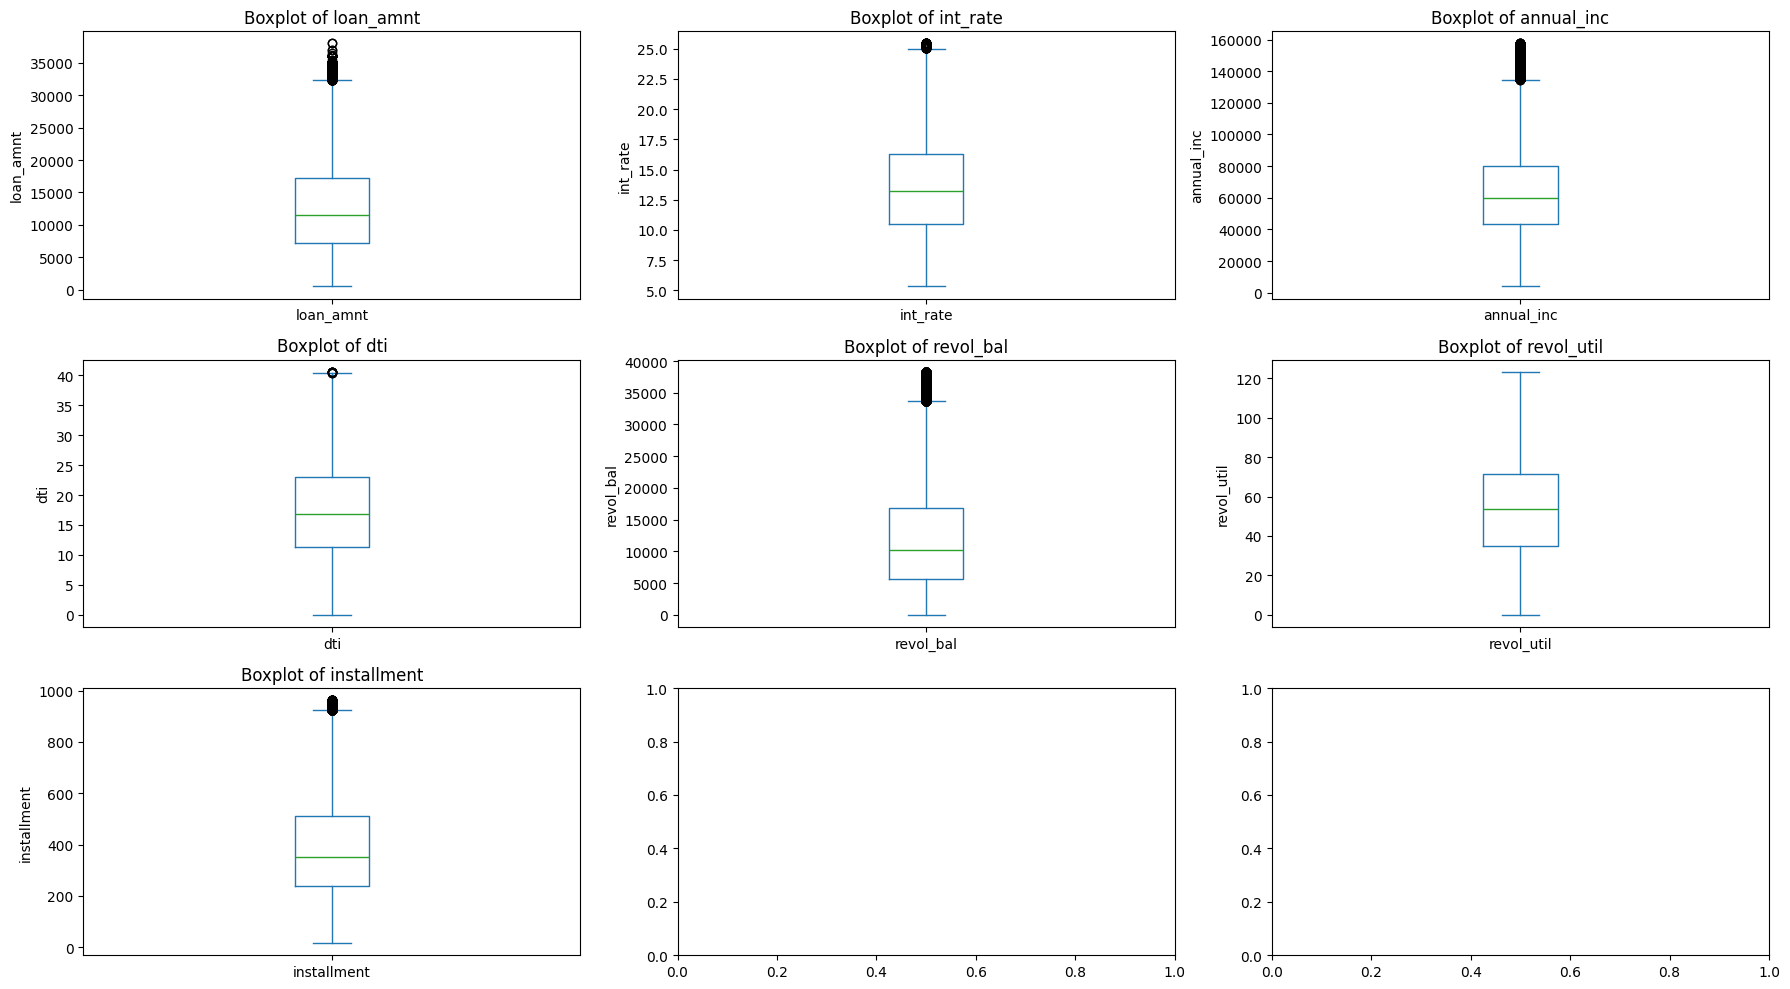

In [82]:
cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'installment']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 10))  

for ax, col in zip(axes.flatten(), cols):
    df[col].plot.box(ax=ax)
    ax.set_title(f"Boxplot of {col}")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()



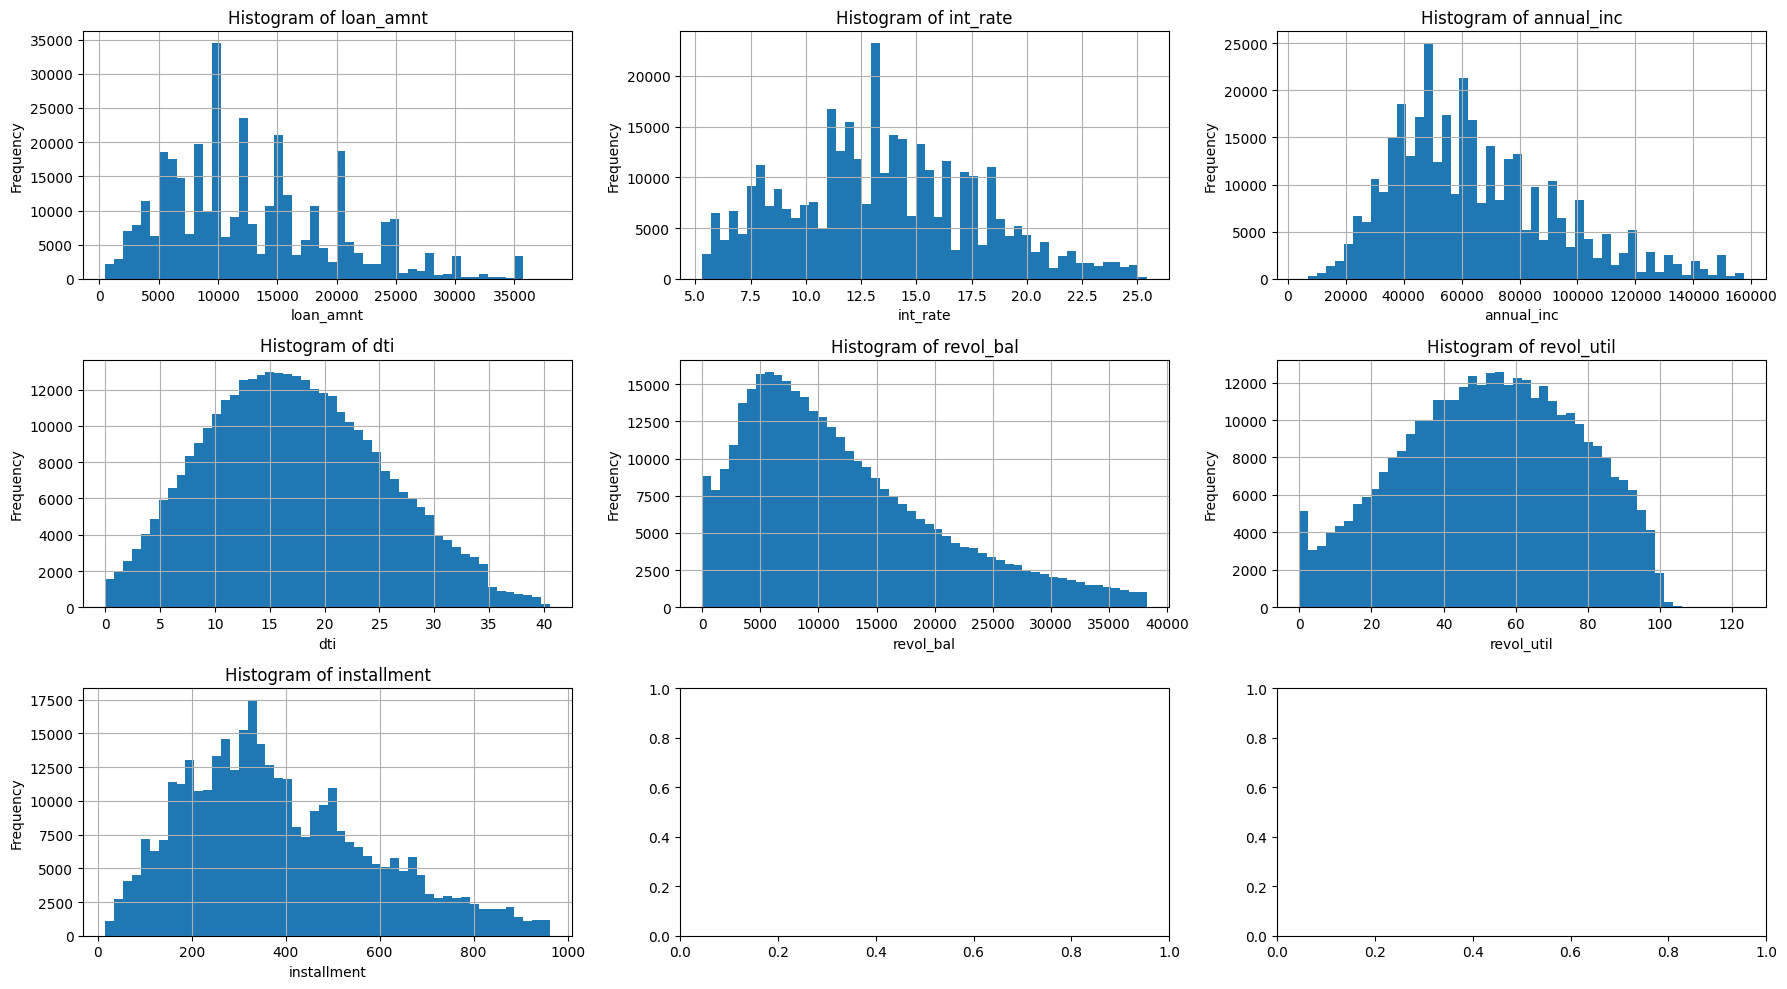

In [ ]:
cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'installment']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 10))  

for ax, col in zip(axes.flatten(), cols):
    df[col].hist(bins=50, ax=ax)
    ax.set_title(f"Histogram of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

if len(cols) < len(axes.flatten()):
    axes.flatten()[-1].axis('off')

plt.tight_layout()
plt.show()


In [84]:
df['annual_inc_log'] = np.log1p(df['annual_inc'])
df['revol_bal_log'] = np.log1p(df['revol_bal'])

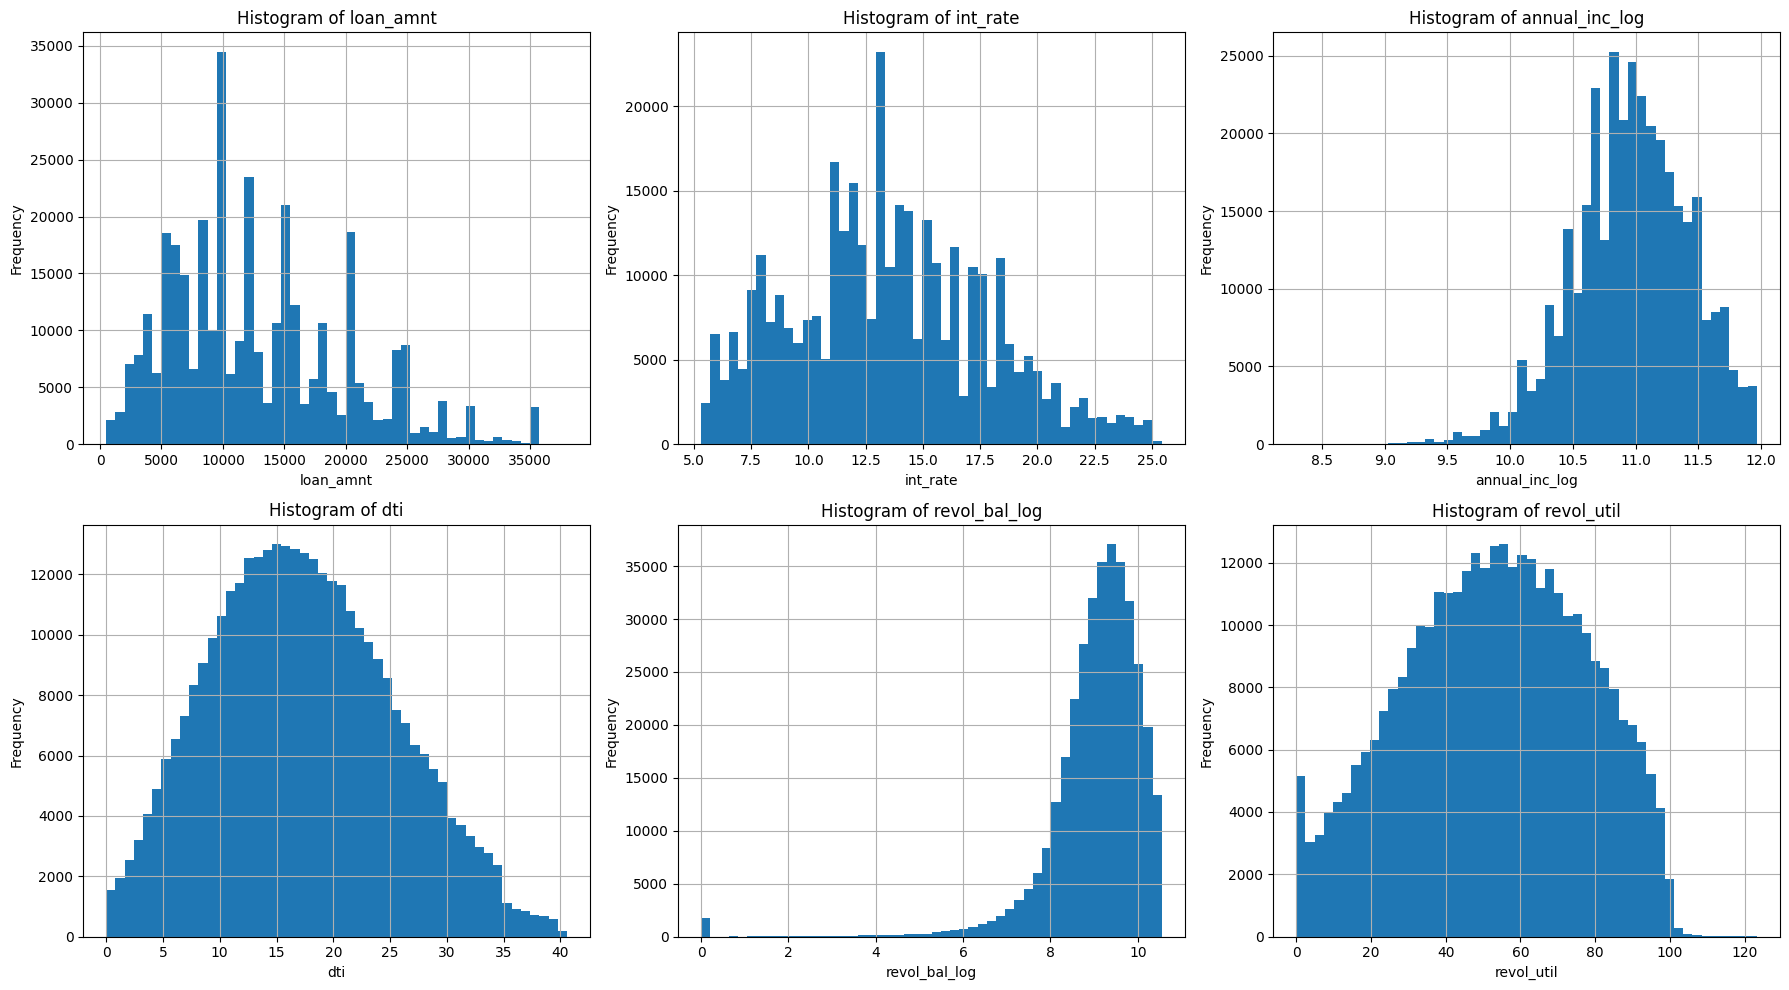

In [85]:
import matplotlib.pyplot as plt

cols = ['loan_amnt', 'int_rate', 'annual_inc_log', 'dti', 'revol_bal_log', 'revol_util']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  

for ax, col in zip(axes.flatten(), cols):
    df[col].hist(bins=50, ax=ax)
    ax.set_title(f"Histogram of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()


In [86]:
outliers.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
18,34000.0,36 months,7.90,1063.87,A,A4,Pilot,10+ years,RENT,130580.00,Verified,Jan-2014,Fully Paid,debt_consolidation,Debt consolidation,25.40,Jan-1990,16.0,0.0,8767.0,11.9,36.0,f,INDIVIDUAL,3.0,0.0,"254 Mary Ferry\nPort Kirstenborough, CO 70466"
57,35000.0,36 months,14.16,1198.94,C,C2,Administrator,9 years,MORTGAGE,118497.84,Verified,Mar-2014,Fully Paid,debt_consolidation,Debt consolidation,10.37,Jun-1995,8.0,0.0,8148.0,83.1,59.0,f,INDIVIDUAL,3.0,0.0,"578 Smith View Suite 106\nMiguelfort, IN 29597"
95,30000.0,36 months,16.49,1061.99,D,D3,Sergeant Major,10+ years,RENT,101000.00,Verified,Nov-2014,Fully Paid,debt_consolidation,Debt consolidation,15.76,Jun-2003,7.0,1.0,6080.0,76.0,15.0,f,INDIVIDUAL,2.0,1.0,"2528 Herrera Track Suite 897\nSavannahburgh, N..."
103,30000.0,36 months,15.31,1044.52,C,C2,Alice G. Alatorre DDS.,9 years,MORTGAGE,108000.00,Verified,Dec-2012,Charged Off,debt_consolidation,Debt consolidation,7.25,May-1998,8.0,0.0,19430.0,84.8,15.0,w,INDIVIDUAL,0.0,0.0,"453 Murray Stream\nSouth Cathyfort, IL 93700"
121,35000.0,36 months,14.65,1207.30,C,C5,Teacher,10+ years,MORTGAGE,95000.00,Source Verified,Oct-2015,Fully Paid,credit_card,Credit card refinancing,13.20,Sep-1997,10.0,0.0,15437.0,42.1,25.0,w,INDIVIDUAL,3.0,0.0,"50540 Joshua Islands Suite 375\nRandallville, ..."


In [87]:
df['int_rate'].max()

np.float64(25.44)